In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.read_csv("placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info

<bound method DataFrame.info of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

In [6]:
df.shape

(100, 4)

In [7]:
df=df.iloc[:,1:]


In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


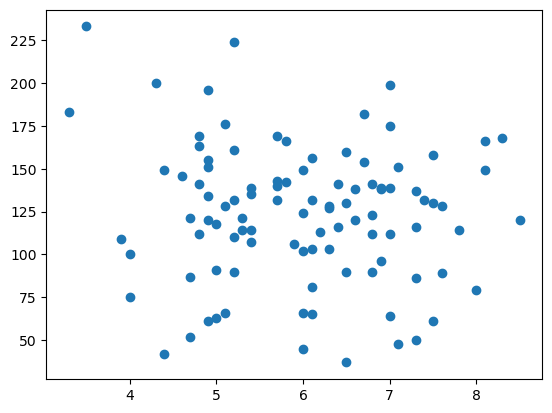

In [9]:
plt.scatter(df['cgpa'],df['iq'])

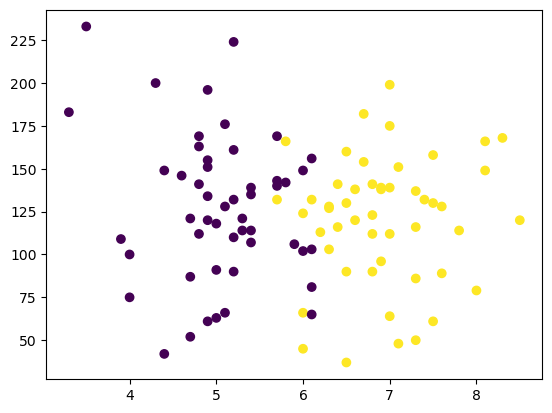

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
73,4.9,61.0
62,6.0,102.0
59,4.8,112.0
14,6.1,103.0
10,6.0,45.0
...,...,...
83,7.5,130.0
9,5.1,66.0
27,6.0,124.0
31,3.9,109.0


In [16]:
Y_train

73    0
62    0
59    0
14    0
10    1
     ..
83    1
9     0
27    1
31    0
66    1
Name: placement, Length: 90, dtype: int64

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.90674233, -1.5523937 ],
       [ 0.0361935 , -0.50074458],
       [-0.99246377, -0.2442448 ],
       [ 0.12191494, -0.4750946 ],
       [ 0.0361935 , -1.96279336],
       [-0.47813514, -0.37249469],
       [ 1.15057221,  0.39700467],
       [-1.07818521, -0.01339499],
       [ 0.20763637, -0.21859482],
       [ 0.72196501, -0.2442448 ],
       [-0.22097082,  0.55090454],
       [ 0.80768645,  0.42265465],
       [-0.64957802,  0.26875478],
       [-0.90674233,  0.32005473],
       [ 0.29335781,  0.16615486],
       [ 1.40773652,  0.16615486],
       [ 1.32201508,  0.93565422],
       [-0.8210209 , -0.78289435],
       [-0.56385658, -0.19294484],
       [-0.22097082,  0.4739546 ],
       [ 1.40773652, -0.8341943 ],
       [ 1.23629365,  0.26875478],
       [ 0.37907925,  0.49960458],
       [ 0.46480069, -2.16799319],
       [ 0.63624357,  0.8330543 ],
       [ 1.15057221, -0.14164488],
       [ 0.89340789,  1.37170386],
       [-0.64957802, -0.80854433],
       [-0.99246377,

In [18]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.65791392, -0.45850844],
       [-1.79313793,  1.29390602],
       [ 0.91591938, -0.72257089],
       [ 0.78691665, -0.0744176 ],
       [-1.14812429, -0.17044031],
       [-0.7611161 ,  0.64575273],
       [-0.24510519, -0.24245734],
       [-0.63211337,  0.57373569],
       [ 0.91591938,  1.36592305],
       [ 1.30292756, -2.2109229 ]])

In [60]:
model=LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [61]:
model.fit(X_train,Y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [62]:
Y_predict=model.predict(X_test)
Y_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [63]:
Y_test

0     1
80    0
29    1
60    1
49    0
84    0
71    1
85    1
26    1
77    1
Name: placement, dtype: int64

In [64]:
accuracy_score(Y_predict,Y_test)

0.8

<Axes: >

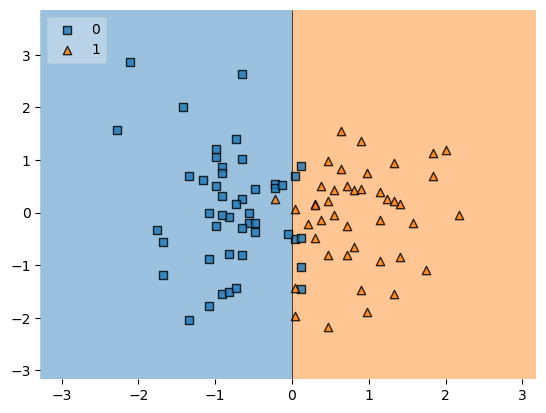

In [65]:
plot_decision_regions(X_train, Y_train.values, clf=model, legend=2)

# UI FOR PREDICTION

In [66]:
import pickle

In [59]:
import tkinter as tk
from tkinter import messagebox
# Load the trained model and scaler
model = pickle.load(open('model.pkl', 'rb'))

def predict_placement():
    try:
        cgpa = float(entry_cgpa.get())
        iq = float(entry_iq.get())
        input_data = np.array([[cgpa, iq]])
        scaled_data = scaler.transform(input_data)
        prediction = model.predict(scaled_data)
        
        if prediction[0] == 1:
            result = "Placement Lag Gai :) "
        else:
            result = "Placement nhi lagi :( "
        
        messagebox.showinfo("Prediction Result", f"Prediction: {result}")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric  values for CGPA and IQ.")

# Create the main window
root = tk.Tk()
root.title("Placement Prediction")

# Create and place the CGPA input
label_cgpa = tk.Label(root, text="CGPA:")
label_cgpa.grid(row=0, column=0, padx=10, pady=10)
entry_cgpa = tk.Entry(root)
entry_cgpa.grid(row=0, column=1, padx=10, pady=10)

# Create and place the IQ input
label_iq = tk.Label(root, text="IQ:")
label_iq.grid(row=1, column=0, padx=10, pady=10)
entry_iq = tk.Entry(root)
entry_iq.grid(row=1, column=1, padx=10, pady=10)

# Create and place the Predict button
btn_predict = tk.Button(root, text="Predict", command=predict_placement)
btn_predict.grid(row=2, column=0, columnspan=2, pady=10)

# Run the Tkinter event loop
root.mainloop()


# Hyperparamerter Tuning

In [68]:


from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, Y_train)
print("Best parameters found: ", grid.best_params_)
model = grid.best_estimator_


E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
